In [58]:
import pandas as pd
from glob import glob
from pathlib import Path
from astropy.io import fits
import matplotlib.pyplot as plt
from mypy.renaming import rename_refs
%matplotlib inline
import numpy as np
from winterdrp_offline.utils import plot_image

In [31]:
base_dir = Path('/Users/viraj/winter_data/winter/hackathon_datasets')
name = 'ZTF25aadlqhw'
night = '20250220'
boardid = 4

target_dir = base_dir.joinpath(f'{name}/{night}/{boardid}/')
full_night_dir = Path('/Users/viraj/winter_data/winter/20250220')

In [37]:
def make_log_df(flatfile_list):
    log_df = pd.DataFrame(columns=['filename', 'boardid', 'filter', 'obstime', 'expmjd'])
    for flatfile in flatfile_list:
        with fits.open(flatfile) as hdul:
            header = hdul[0].header
            filter_ = header['FILTER']
            boardid = header['BOARD_ID']
            obstime = header['DATE-OBS']
            expmjd = header['EXPMJD']
            filename = flatfile
            log_df = pd.concat([log_df, pd.DataFrame({'filename': [filename],
                                                      'boardid': [boardid],
                                                      'filter': [filter_],
                                                      'obstime': [obstime],
                                                      'expmjd': [expmjd]})], ignore_index=True)
    return log_df

In [38]:
flatfiles = glob(full_night_dir.joinpath('calibration_flats/*fits').as_posix())

In [ ]:
# renamed flats_directory
rename_flats_directory = full_night_dir.joinpath('calibration_flats_renamed')
rename_flats_directory.mkdir(exist_ok=True)
# copy files but renamed with board, filter, and time
for flatfile in flatfiles:
    with fits.open(flatfile) as hdul:
        header = hdul[0].header
        filter_ = header['FILTER']
        boardid = header['BOARD_ID']
        obstime = header['DATE-OBS'].replace(':', '').replace('-', '').replace('T', '_')
        new_filename = f"flat_{boardid}_{filter_}_{obstime}.fits"
        new_filepath = rename_flats_directory.joinpath(new_filename)
        hdul.writeto(new_filepath.as_posix(), overwrite=True)

In [39]:
flat_df = make_log_df(flatfiles)

/var/folders/1d/r0f_wd9x10v1pb53kt5hsjg00000gn/T/ipykernel_40742/1150795373.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  log_df = pd.concat([log_df, pd.DataFrame({'filename': [filename],


In [40]:
flat_df = flat_df[flat_df['boardid']==4]
flat_df = flat_df.sort_values('expmjd')

In [41]:
flat_df

,filename,boardid,filter,obstime,expmjd
8,/Users/viraj/winter_data/winter/20250220/calib...,4,J,2025-02-21T02:16:16.352,60727.094634
125,/Users/viraj/winter_data/winter/20250220/calib...,4,J,2025-02-21T02:33:34.632,60727.106651
87,/Users/viraj/winter_data/winter/20250220/calib...,4,J,2025-02-21T02:53:14.233,60727.120304
148,/Users/viraj/winter_data/winter/20250220/calib...,4,J,2025-02-21T03:08:34.228,60727.130952
212,/Users/viraj/winter_data/winter/20250220/calib...,4,J,2025-02-21T03:40:44.999,60727.153299
22,/Users/viraj/winter_data/winter/20250220/calib...,4,J,2025-02-21T03:45:21.768,60727.156502
186,/Users/viraj/winter_data/winter/20250220/calib...,4,J,2025-02-21T04:00:33.176,60727.167051
178,/Users/viraj/winter_data/winter/20250220/calib...,4,J,2025-02-21T04:26:21.153,60727.184967
132,/Users/viraj/winter_data/winter/20250220/calib...,4,J,2025-02-21T04:35:58.753,60727.191652
192,/Users/viraj/winter_data/winter/20250220/calib...,4,J,2025-02-21T04:54:54.918,60727.204802


In [64]:
# Divide successive flats and save them
flat_div_dir = full_night_dir.joinpath('flat_successive_div')
flat_div_dir.mkdir(exist_ok=True)

for i in range(len(flat_df)-1):
    with fits.open(flat_df.iloc[i]['filename']) as hdul1:
        with fits.open(flat_df.iloc[i+1]['filename']) as hdul2:
            flat1 = hdul1[0].data
            flat2 = hdul2[0].data
            flat_div = flat1 / flat2
            hdu = fits.PrimaryHDU(flat_div)
            obstime = hdul1[0].header['DATE-OBS'].replace(':', '').replace('-', '').replace('T', '_')
            new_filename = f"flat_div_{obstime}.fits"
            hdu.writeto(flat_div_dir.joinpath(new_filename).as_posix(), overwrite=True)

/var/folders/1d/r0f_wd9x10v1pb53kt5hsjg00000gn/T/ipykernel_40742/1822810269.py:10: RuntimeWarning: divide by zero encountered in divide
  flat_div = flat1 / flat2


In [67]:
flat_div_images = glob(flat_div_dir.joinpath('flat_div_*.fits').as_posix())
print(f"Found {len(flat_div_images)} flat divisions.")

Found 38 flat divisions.


<Figure size 640x480 with 0 Axes>

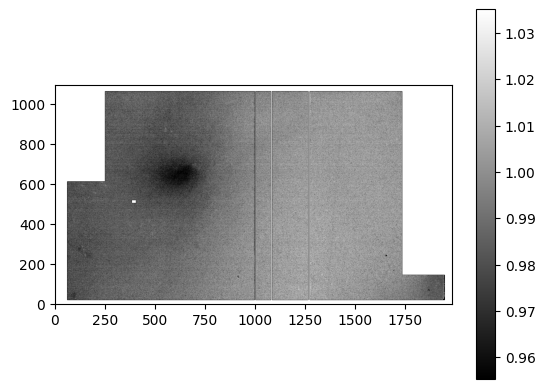

<Figure size 640x480 with 0 Axes>

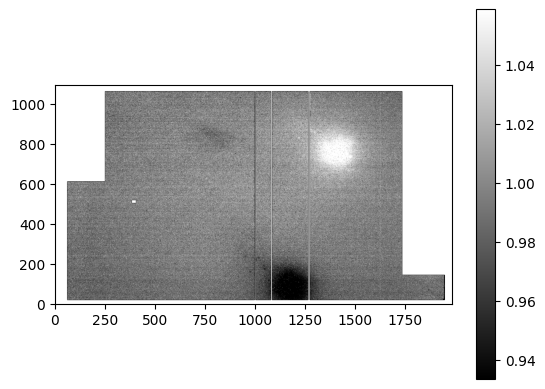

<Figure size 640x480 with 0 Axes>

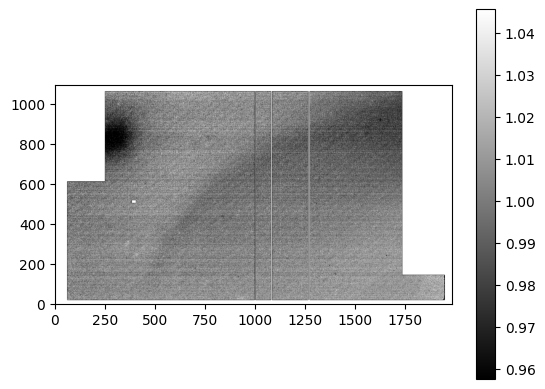

<Figure size 640x480 with 0 Axes>

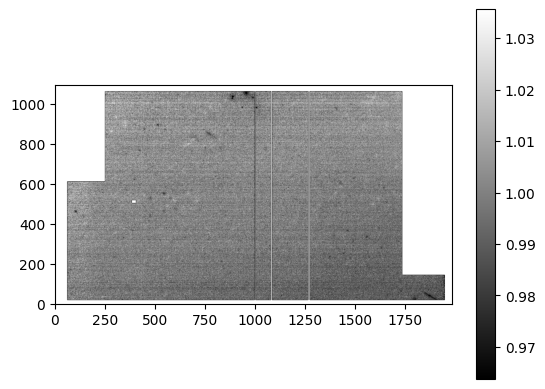

<Figure size 640x480 with 0 Axes>

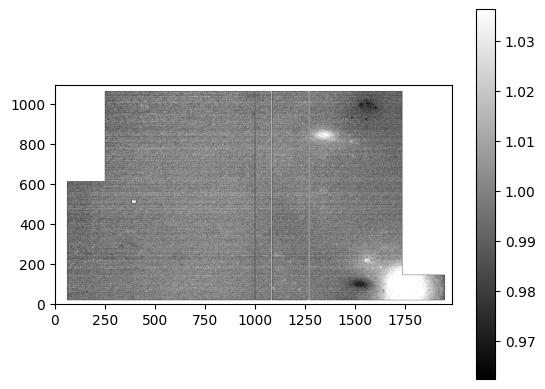

In [72]:
# plot images
for flat_div_image in flat_div_images[15:20]:
    with fits.open(flat_div_image) as hdul:
        plt.figure()
        flat_div_data = hdul[0].data

        # plt.imshow(flat_div, cmap='seismic', origin='lower', vmin=-10, vmax=10)
        plot_image(flat_div_data,)


In [69]:
# Calculate RMS in a central region
def calculate_rms(image, region_size=100):
    """
    Calculate the RMS in a central region of the image.
    """
    # Define the central region
    center_x, center_y = image.shape[1] // 2, image.shape[0] // 2
    region = image[center_y - region_size // 2:center_y + region_size // 2,
                   center_x - region_size // 2:center_x + region_size // 2]

    # Calculate RMS
    rms = np.nanstd(region)
    return rms



In [70]:
rms_values = []
for flat_div_image in flat_div_images:
    with fits.open(flat_div_image) as hdul:
        flat_div = hdul[0].data
        rms = calculate_rms(flat_div, region_size=500)
        rms_values.append(rms)

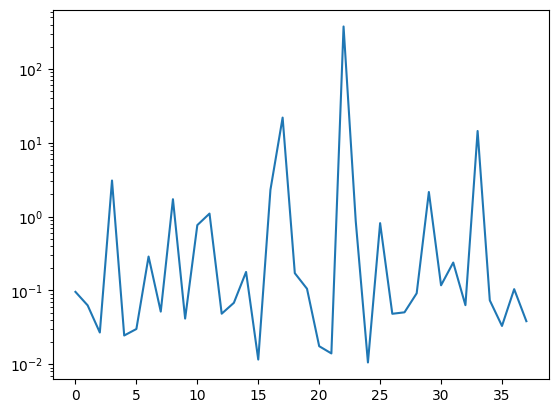

In [71]:
plt.plot(rms_values)
plt.yscale('log')

In [61]:
flat_df

,filename,boardid,filter,obstime,expmjd
8,/Users/viraj/winter_data/winter/20250220/calib...,4,J,2025-02-21T02:16:16.352,60727.094634
125,/Users/viraj/winter_data/winter/20250220/calib...,4,J,2025-02-21T02:33:34.632,60727.106651
87,/Users/viraj/winter_data/winter/20250220/calib...,4,J,2025-02-21T02:53:14.233,60727.120304
148,/Users/viraj/winter_data/winter/20250220/calib...,4,J,2025-02-21T03:08:34.228,60727.130952
212,/Users/viraj/winter_data/winter/20250220/calib...,4,J,2025-02-21T03:40:44.999,60727.153299
22,/Users/viraj/winter_data/winter/20250220/calib...,4,J,2025-02-21T03:45:21.768,60727.156502
186,/Users/viraj/winter_data/winter/20250220/calib...,4,J,2025-02-21T04:00:33.176,60727.167051
178,/Users/viraj/winter_data/winter/20250220/calib...,4,J,2025-02-21T04:26:21.153,60727.184967
132,/Users/viraj/winter_data/winter/20250220/calib...,4,J,2025-02-21T04:35:58.753,60727.191652
192,/Users/viraj/winter_data/winter/20250220/calib...,4,J,2025-02-21T04:54:54.918,60727.204802
